In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
def plot_sample(X, index):
    plt.imshow(X[index])

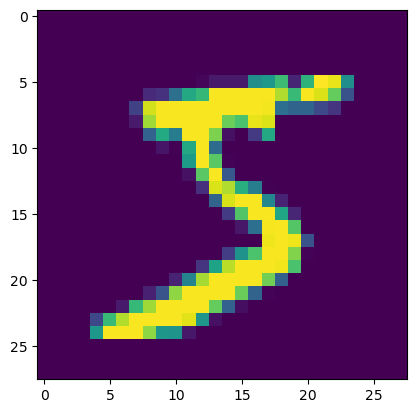

In [7]:
plot_sample(X_train, 0)

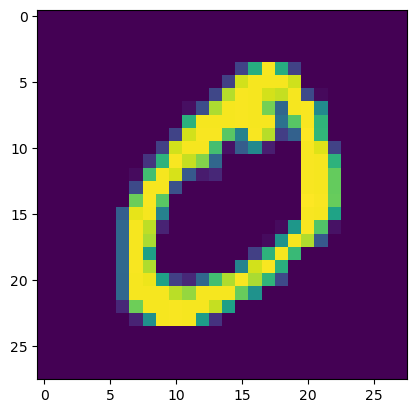

In [8]:
plot_sample(X_train, 1)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4964 - accuracy: 0.8607
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2745 - accuracy: 0.9226
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2612 - accuracy: 0.9271
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2503 - accuracy: 0.9291
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2414 - accuracy: 0.9322
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2331 - accuracy: 0.9345
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2261 - accuracy: 0.9352
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2205 - accuracy: 0.9370
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.214

In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2310 - accuracy: 0.9333


[0.2310141623020172, 0.9333000183105469]

In [14]:
y_pred=[np.argmax(element) for element in ann.predict(X_test)]

313/313 [==============================] - 1s 2ms/step


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.91      0.93      1032
           3       0.94      0.91      0.93      1010
           4       0.93      0.94      0.94       982
           5       0.91      0.88      0.89       892
           6       0.93      0.96      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.93      0.90       974
           9       0.90      0.94      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [25]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.3203 - accuracy: 0.9013
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1156 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0628 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0250 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9883


[0.03659699484705925, 0.9883000254631042]

In [27]:
y_pred=[np.argmax(element) for element in cnn.predict(X_test)]

313/313 [==============================] - 1s 2ms/step


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

